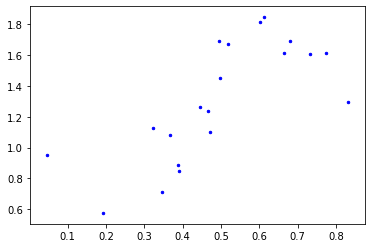

In [2]:
import numpy as np
import matplotlib.pylab as plt
t=np.loadtxt("numeros_20.txt")
y=t[:,1]
x=t[:,0]
plt.scatter(t[:,0],t[:,1],color='blue',s=6)

def AproxFit2(x,y,M):
    #Creación de la Matriz de coeficientes
    def Coef(x,M):
        A=[]
        for i in range(len(x)):
            B=[]
            for j in range(M+1):
                B.append(x[i]**j)
            A.append(B)
        return A
    
    #Declaración de las Matrices para el producto matricial
    S=np.array(Coef(x,M))
    S1=np.linalg.pinv(S)
    c=np.dot(S1,y)
    
    return c
#Construcción de la Función
def f(x,c):
    suma=0
    for i in range(len(c)):
        y=c[i]*(x**i)
        suma+=y
    return suma

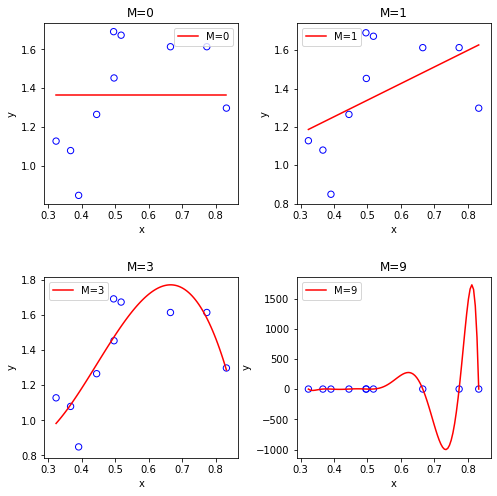

In [52]:
fig, axs = plt.subplots(2,2, figsize=(8, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
M=[0,1,3,9]
xl=x[:10]
yl=y[:10]
xt=x[10:]
yt=y[10:]
Coef=[]
for i in range(4):
    c=AproxFit2(xl,yl,M[i])
    Coef.append(c)
    xm=np.linspace(np.min(xl),np.max(xl),100)
    axs[i].set_title("M=" + str(M[i]))
    axs[i].plot(xm,f(xm,c),label="M=" + str(M[i]),color='red')
    axs[i].scatter(xl,yl,facecolor='none',edgecolor='blue',s=40)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].legend(loc=0)

In [12]:
Coef=[]
for i in range(10):
    c=AproxFit2(xl,yl,i)
    Coef.append(c)

In [53]:
def E(x,y,c):
    N=len(x)
    a=f(x,c)-y
    c=np.power(a,2)
    b=np.sum(c)
    return np.sqrt(b/N)

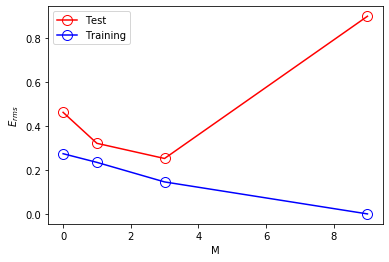

In [74]:
E_test=[]
E_training=[]
for i in range (len(Coef)):
    E_test.append(E(xt,yt,Coef[i]))
    E_training.append(E(xl,yl,Coef[i]))
#Dado que E_test[-1] es mayor a un millón, se le asigna el valor de 0.9 para poderlo graficar
E_test[-1]=0.9
plt.plot(M,E_test,label='Test',c='red', marker = 'o',markerfacecolor='none',markeredgecolor='red', ms=10)
plt.plot(M,E_training, label='Training',c='blue', marker = 'o',markerfacecolor='none',markeredgecolor='blue', ms=10)
plt.xlabel("M")
plt.ylabel("$E_{rms}$")
plt.legend()
loc=0

In [62]:
E_test[-1]

1406862.4078961706